## Ultimate goal:

1. Use spikeinterfaces tools to load data (in neuralynx) and run spike sorting
2. After conversion to nwb - run spike sorting on that data

## Status update:

so far not that much progress -- besides complaining to spikeinterfaces ppl.

In [1]:
# Recommended import aliases: https://spikeinterface.readthedocs.io/en/latest/getting_started/plot_getting_started.html
import spikeinterface.extractors as se
import spikeinterface.toolkit as st
import spikeinterface.sorters as ss
import spikeinterface.comparison as sc
import spikeinterface.widgets as sw
# Additional imports
import os.path as op
import neo  # neo for some direct reading to check on # of segments etc

In [2]:
se.installed_recording_extractor_list

[spikeextractors.extractors.mdaextractors.mdaextractors.MdaRecordingExtractor,
 spikeextractors.extractors.biocamrecordingextractor.biocamrecordingextractor.BiocamRecordingExtractor,
 spikeextractors.extractors.bindatrecordingextractor.bindatrecordingextractor.BinDatRecordingExtractor,
 spikeextractors.extractors.klustaextractors.klustaextractors.KlustaRecordingExtractor,
 spikeextractors.extractors.kilosortextractors.kilosortextractors.KiloSortRecordingExtractor,
 spikeextractors.extractors.spykingcircusextractors.spykingcircusextractors.SpykingCircusRecordingExtractor,
 spikeextractors.extractors.spikeglxrecordingextractor.spikeglxrecordingextractor.SpikeGLXRecordingExtractor,
 spikeextractors.extractors.phyextractors.phyextractors.PhyRecordingExtractor,
 spikeextractors.extractors.maxonerecordingextractor.maxonerecordingextractor.MaxOneRecordingExtractor,
 spikeextractors.extractors.mea1krecordingextractor.mea1krecordingextractor.Mea1kRecordingExtractor,
 spikeextractors.extractors.

In [3]:
# To get klusta (klustakwik?) -- followed docs and ran `pip install click klusta klustakwik2` 
ss.installed_sorter_list

[spikesorters.klusta.klusta.KlustaSorter]

In [4]:
ss.get_default_params('klusta')

{'adjacency_radius': None,
 'threshold_strong_std_factor': 5,
 'threshold_weak_std_factor': 2,
 'detect_sign': -1,
 'extract_s_before': 16,
 'extract_s_after': 32,
 'n_features_per_channel': 3,
 'pca_n_waveforms_max': 10000,
 'num_starting_clusters': 50}

# Sample Neuralynx recording analysis attempt 

## Read the data
Use `neo` directly to get sense of the data and then specific extractor

In [5]:
# get a sample file, available via DataLad or you could download manually by 
# visiting http://datasets.datalad.org/?dir=/labs/mvdm/MotivationalT-v2/R050/R050-2014-03-31_raw
#import datalad.api as dl
#ds = dl.install("///labs/mvdm/MotivationalT-v2")
#sample_file = ds.get('R050/R050-2014-03-31_raw/R050-2014-03-31-TT04.ntt')
sample_file = 'MotivationalT-v2/R050/R050-2014-03-31_raw/R050-2014-03-31-TT04.ntt'

In [6]:
# just to check for number of blocks/segments since only one should be provided to extractor ATM
reader = neo.NeuralynxIO(dirname=op.dirname(sample_file))
print(reader)

NeuralynxIO: MotivationalT-v2/R050/R050-2014-03-31_raw
nb_block: 1
nb_segment:  [3]
signal_channels: [CSC33, CSC41, CSC45, CSC50 ... HS1R1 HS1R2 HS3R1 HS3R2]
unit_channels: [chTT1#64#0, chTT1#65#0, chTT1#66#0, chTT1#67#0 ... chTT16#28#0 chTT16#29#0 chTT16#30#0 chTT16#31#0]
event_channels: [Events event_id=11 ttl=0, Events event_id=11 ttl=4, Events event_id=11 ttl=32, Events event_id=11 ttl=64, Events event_id=11 ttl=128]



In [7]:
# so we have multiple segments (one block), so I needed to provide seg_index
# Here we also need to use an explicit `dirname=` kwargs and point to the entire session: 
# filed issue https://github.com/SpikeInterface/spikeextractors/issues/364 and pull request 
# https://github.com/SpikeInterface/spikeextractors/pull/363 to mitigate intermediate 
recording = se.NeuralynxRecordingExtractor(dirname=op.dirname(sample_file), seg_index=0) # block_index=0, 
# Following one bugs out: https://github.com/SpikeInterface/spikeextractors/issues/367
# print(recording.dump_to_json())
recording

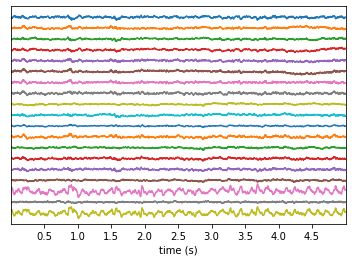

In [8]:
sw.plot_timeseries(recording);
# bugs out: https://github.com/SpikeInterface/spikeextractors/issues/368
# sw.plot_rasters(recording); 

In [10]:
ss.run_klusta(recording)

ValueError: non-broadcastable output operand with shape (1,1) doesn't match the broadcast shape (1,19)